In [1]:
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = keras.datasets.mnist.load_data()

In [3]:
print('x_train_image:',x_Train.shape)
print('y_train_label:',y_Train.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [4]:
print('x_test_image:',x_Test.shape)
print('y_test_label:',y_Test.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


In [5]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

In [6]:
x_Train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

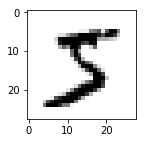

In [7]:
plot_image(x_Train[0])

In [8]:
y_Train[0]

5

In [9]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

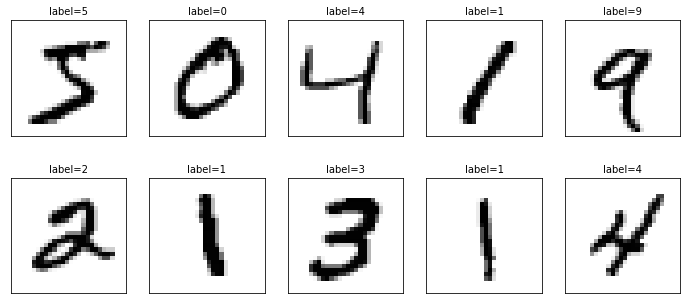

In [10]:
plot_images_labels_prediction(x_Train,y_Train,[],0,10)

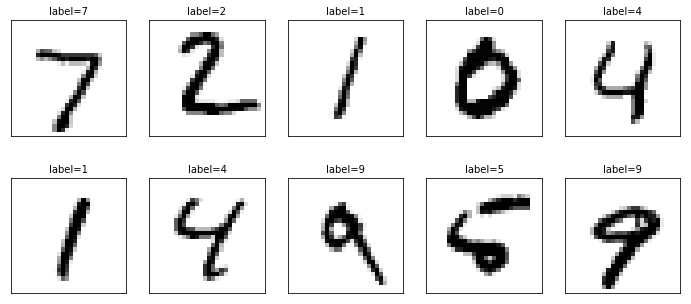

In [11]:
plot_images_labels_prediction(x_Test,y_Test,[],0,10)


In [12]:
x_Train.shape

(60000, 28, 28)

In [13]:
# 多加一個顏色的維度 
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [14]:
x_Train4D.shape

(60000, 28, 28, 1)

In [15]:
# 將數值縮小到0~1
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [16]:
# 把類別做Onehot encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [17]:
y_TrainOneHot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [19]:
model = Sequential()

In [20]:
#filter為16, Kernel size為(5,5),Padding為(same)
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [21]:
# MaxPooling size為(2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
# Drop掉部分神經元避免overfitting
model.add(Dropout(0.25))

In [25]:
# 平坦化
model.add(Flatten())

In [26]:
model.add(Dense(128, activation='relu'))

In [27]:
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:
train_history=model.fit(x=x_Train4D_normalize[1:6001], 
                        y=y_TrainOneHot[1:6001],validation_split=0.2, 
                        epochs=40, batch_size=300,verbose=2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/40
 - 8s - loss: 1.7510 - acc: 0.4490 - val_loss: 0.7969 - val_acc: 0.7975
Epoch 2/40
 - 7s - loss: 0.7638 - acc: 0.7623 - val_loss: 0.4015 - val_acc: 0.8867
Epoch 3/40
 - 6s - loss: 0.4803 - acc: 0.8525 - val_loss: 0.2963 - val_acc: 0.9150
Epoch 4/40
 - 7s - loss: 0.3446 - acc: 0.8960 - val_loss: 0.2330 - val_acc: 0.9267
Epoch 5/40
 - 7s - loss: 0.2915 - acc: 0.9135 - val_loss: 0.1922 - val_acc: 0.9450
Epoch 6/40
 - 7s - loss: 0.2433 - acc: 0.9260 - val_loss: 0.1676 - val_acc: 0.9533
Epoch 7/40
 - 7s - loss: 0.2012 - acc: 0.9396 - val_loss: 0.1576 - val_acc: 0.9567
Epoch 8/40
 - 7s - loss: 0.1750 - acc: 0.9494 - val_loss: 0.1375 - val_acc: 0.9633
Epoch 9/40
 - 7s - loss: 0.1644 - acc: 0.9500 - val_loss: 0.1235 - val_acc: 0.9650
Epoch 10/40
 - 7s - loss: 0.1450 - acc: 0.9552 - val_loss: 0.1208 - val_acc: 0.9692
Epoch 11/40
 - 7s - loss: 0.1367 - acc: 0.9594 - val_loss: 0.1260 - val_acc: 0.9642
Epoch 12/40
 - 7s - loss: 0.1303 - ac

In [30]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

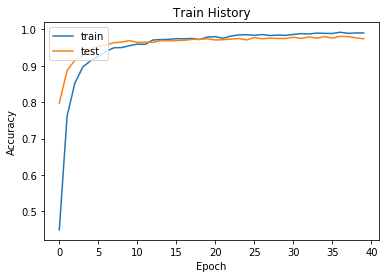

In [31]:
show_train_history('acc','val_acc')

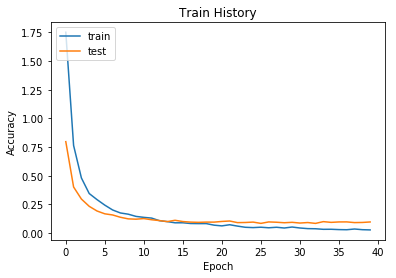

In [32]:
show_train_history('loss','val_loss')

In [33]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 542us/step


0.9795

In [34]:
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [35]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

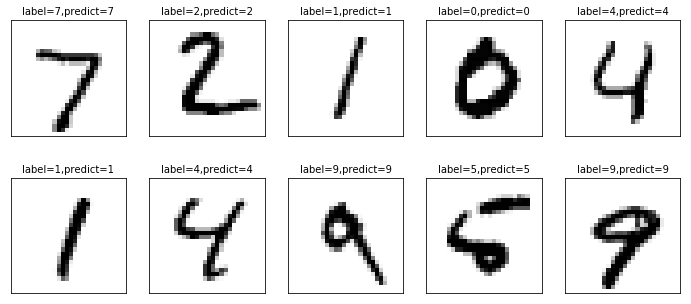

In [36]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [37]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,0,0,0,0,0,4,1,2,0
1,0,1123,3,2,0,1,2,0,4,0
2,5,1,1010,5,1,0,0,5,5,0
3,0,0,1,992,0,9,0,5,3,0
4,0,0,2,0,960,0,4,1,2,13
5,2,0,0,3,0,884,2,0,1,0
6,5,3,0,0,3,5,937,0,5,0
7,0,3,14,3,0,0,0,994,2,12
8,6,1,3,7,2,0,0,6,946,3


In [38]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
1737,5,3
3117,5,3


In [39]:
df[(df.label==5)&(df.predict==3)].index

Int64Index([1393, 1737, 3117], dtype='int64')

IndexError: list index out of range

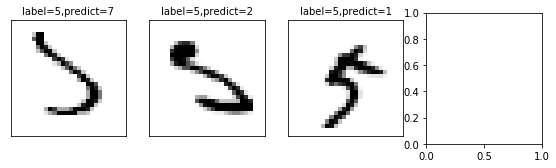

In [40]:
plot_images_labels_prediction([x_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],[y_Test[i] for i in df[(df.label==5)&(df.predict==3)].index],prediction,idx=0)